# RBM Recommender system, training and example

In [1]:
from src.eval import evaluate_rbm, evaluate_dbn
from src.data_preprocessing import load_data, preprocess_data, load_movies
from src.models import RBM, DBN
from src.training import train_rbm, train_dbn
from src.plot_utils import plot_training_loss
from sklearn.model_selection import train_test_split
from src.utils import recommend, movie_from_tensor, test_recommendation_ability
import torch
import random
import copy

## TRAINING
First we intialize our dataset and parameters. In our dataset, movies user hasn't watched are marked as 0 and rates are scaled from 1-5 to (0, 1].

In [2]:
file_path = "data\\ml-100k\\u.data"
data = load_data(file_path)
interaction_matrix = preprocess_data(data)


interaction_tensor = torch.tensor(interaction_matrix.values, dtype=torch.float32)
train_data, test_data = train_test_split(interaction_tensor.numpy(), test_size=0.3, random_state=42)

train_data = torch.tensor(train_data, dtype=torch.float32)
test_data = torch.tensor(test_data, dtype=torch.float32)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_visible = interaction_tensor.shape[1]
num_hidden = 200

Next we train RBM on the given dataset.

Epoch 1/40: 100%|██████████| 42/42 [00:00<00:00, 44.21it/s, Loss=0.225]


Reconstruction Loss: 0.3033


Epoch 2/40: 100%|██████████| 42/42 [00:00<00:00, 42.16it/s, Loss=0.17] 


Reconstruction Loss: 0.1954


Epoch 3/40: 100%|██████████| 42/42 [00:00<00:00, 43.92it/s, Loss=0.142]


Reconstruction Loss: 0.1621


Epoch 4/40: 100%|██████████| 42/42 [00:00<00:00, 43.29it/s, Loss=0.111]


Reconstruction Loss: 0.1436


Epoch 5/40: 100%|██████████| 42/42 [00:00<00:00, 45.58it/s, Loss=0.122]


Reconstruction Loss: 0.1316


Epoch 6/40: 100%|██████████| 42/42 [00:00<00:00, 45.23it/s, Loss=0.0919]


Reconstruction Loss: 0.1222


Epoch 7/40: 100%|██████████| 42/42 [00:00<00:00, 45.80it/s, Loss=0.141] 


Reconstruction Loss: 0.1157


Epoch 8/40: 100%|██████████| 42/42 [00:00<00:00, 46.25it/s, Loss=0.106] 


Reconstruction Loss: 0.1089


Epoch 9/40: 100%|██████████| 42/42 [00:01<00:00, 40.68it/s, Loss=0.0778]


Reconstruction Loss: 0.1028


Epoch 10/40: 100%|██████████| 42/42 [00:00<00:00, 45.36it/s, Loss=0.0845]


Reconstruction Loss: 0.0977


Epoch 11/40: 100%|██████████| 42/42 [00:00<00:00, 43.80it/s, Loss=0.121] 


Reconstruction Loss: 0.0938


Epoch 12/40: 100%|██████████| 42/42 [00:00<00:00, 44.36it/s, Loss=0.123] 


Reconstruction Loss: 0.0893


Epoch 13/40: 100%|██████████| 42/42 [00:01<00:00, 41.68it/s, Loss=0.0647]


Reconstruction Loss: 0.0841


Epoch 14/40: 100%|██████████| 42/42 [00:00<00:00, 46.27it/s, Loss=0.0891]


Reconstruction Loss: 0.0808


Epoch 15/40: 100%|██████████| 42/42 [00:00<00:00, 45.00it/s, Loss=0.0772]


Reconstruction Loss: 0.0773


Epoch 16/40: 100%|██████████| 42/42 [00:00<00:00, 44.17it/s, Loss=0.0667]


Reconstruction Loss: 0.0739


Epoch 17/40: 100%|██████████| 42/42 [00:00<00:00, 44.72it/s, Loss=0.0387]


Reconstruction Loss: 0.0706


Epoch 18/40: 100%|██████████| 42/42 [00:00<00:00, 42.64it/s, Loss=0.0596]


Reconstruction Loss: 0.0686


Epoch 19/40: 100%|██████████| 42/42 [00:00<00:00, 46.30it/s, Loss=0.0525]


Reconstruction Loss: 0.0663


Epoch 20/40: 100%|██████████| 42/42 [00:00<00:00, 42.63it/s, Loss=0.0395]


Reconstruction Loss: 0.0641


Epoch 21/40: 100%|██████████| 42/42 [00:00<00:00, 45.92it/s, Loss=0.0559]


Reconstruction Loss: 0.0625


Epoch 22/40: 100%|██████████| 42/42 [00:00<00:00, 42.75it/s, Loss=0.0643]


Reconstruction Loss: 0.0609


Epoch 23/40: 100%|██████████| 42/42 [00:01<00:00, 41.88it/s, Loss=0.0781]


Reconstruction Loss: 0.0595


Epoch 24/40: 100%|██████████| 42/42 [00:00<00:00, 42.92it/s, Loss=0.0443]


Reconstruction Loss: 0.0575


Epoch 25/40: 100%|██████████| 42/42 [00:01<00:00, 39.81it/s, Loss=0.0542]


Reconstruction Loss: 0.0561


Epoch 26/40: 100%|██████████| 42/42 [00:00<00:00, 43.05it/s, Loss=0.0545]


Reconstruction Loss: 0.0547


Epoch 27/40: 100%|██████████| 42/42 [00:00<00:00, 46.01it/s, Loss=0.0494]


Reconstruction Loss: 0.0534


Epoch 28/40: 100%|██████████| 42/42 [00:01<00:00, 39.14it/s, Loss=0.0322]


Reconstruction Loss: 0.0519


Epoch 29/40: 100%|██████████| 42/42 [00:00<00:00, 44.27it/s, Loss=0.0579]


Reconstruction Loss: 0.0511


Epoch 30/40: 100%|██████████| 42/42 [00:00<00:00, 44.65it/s, Loss=0.0362]


Reconstruction Loss: 0.0497


Epoch 31/40: 100%|██████████| 42/42 [00:01<00:00, 39.05it/s, Loss=0.0375]


Reconstruction Loss: 0.0486


Epoch 32/40: 100%|██████████| 42/42 [00:01<00:00, 40.42it/s, Loss=0.0295]


Reconstruction Loss: 0.0475


Epoch 33/40: 100%|██████████| 42/42 [00:01<00:00, 40.34it/s, Loss=0.0368]


Reconstruction Loss: 0.0468


Epoch 34/40: 100%|██████████| 42/42 [00:00<00:00, 45.13it/s, Loss=0.0651]


Reconstruction Loss: 0.0464


Epoch 35/40: 100%|██████████| 42/42 [00:00<00:00, 47.88it/s, Loss=0.0595]


Reconstruction Loss: 0.0456


Epoch 36/40: 100%|██████████| 42/42 [00:00<00:00, 45.95it/s, Loss=0.0473]


Reconstruction Loss: 0.0446


Epoch 37/40: 100%|██████████| 42/42 [00:00<00:00, 46.57it/s, Loss=0.0149]


Reconstruction Loss: 0.0434


Epoch 38/40: 100%|██████████| 42/42 [00:00<00:00, 44.98it/s, Loss=0.0317]


Reconstruction Loss: 0.0430


Epoch 39/40: 100%|██████████| 42/42 [00:00<00:00, 43.04it/s, Loss=0.0277]


Reconstruction Loss: 0.0422


Epoch 40/40: 100%|██████████| 42/42 [00:00<00:00, 43.95it/s, Loss=0.0604]


Reconstruction Loss: 0.0422


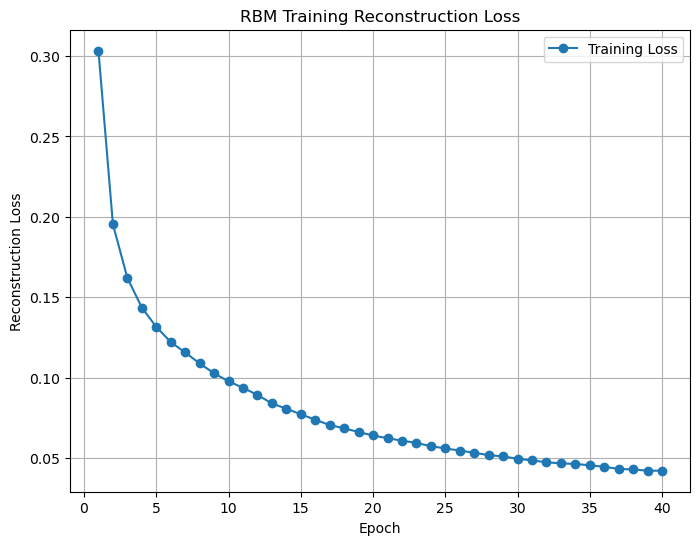

Validation loss: 0.05852438935963931
Validation accuracy: 66.17920782511145%


In [3]:
rbm = RBM(num_visible=num_visible, num_hidden=num_hidden, device=device)

losses = train_rbm(rbm, train_data, epochs=40, learning_rate=0.01, batch_size=16)

plot_training_loss(losses, title="RBM Training Reconstruction Loss", xlabel="Epoch", ylabel="Reconstruction Loss")
loss, acc = evaluate_rbm(rbm, test_data, device)
print(f"Validation loss: {loss}")
print(f"Validation accuracy: {acc*100}%")

Furthermore, we train DBN on the same dataset. The goal is to compare them.

Epoch 1/40: 100%|██████████| 42/42 [00:00<00:00, 71.09it/s, Loss=0.273]


Reconstruction Loss: 0.3583


Epoch 2/40: 100%|██████████| 42/42 [00:00<00:00, 70.63it/s, Loss=0.195]


Reconstruction Loss: 0.2315


Epoch 3/40: 100%|██████████| 42/42 [00:00<00:00, 61.42it/s, Loss=0.141]


Reconstruction Loss: 0.1822


Epoch 4/40: 100%|██████████| 42/42 [00:00<00:00, 61.51it/s, Loss=0.17] 


Reconstruction Loss: 0.1507


Epoch 5/40: 100%|██████████| 42/42 [00:00<00:00, 65.45it/s, Loss=0.109] 


Reconstruction Loss: 0.1249


Epoch 6/40: 100%|██████████| 42/42 [00:00<00:00, 71.50it/s, Loss=0.129] 


Reconstruction Loss: 0.1128


Epoch 7/40: 100%|██████████| 42/42 [00:00<00:00, 67.01it/s, Loss=0.0812]


Reconstruction Loss: 0.1037


Epoch 8/40: 100%|██████████| 42/42 [00:00<00:00, 69.63it/s, Loss=0.0925]


Reconstruction Loss: 0.0957


Epoch 9/40: 100%|██████████| 42/42 [00:00<00:00, 65.02it/s, Loss=0.0425]


Reconstruction Loss: 0.0924


Epoch 10/40: 100%|██████████| 42/42 [00:00<00:00, 65.97it/s, Loss=0.0262]


Reconstruction Loss: 0.0881


Epoch 11/40: 100%|██████████| 42/42 [00:00<00:00, 68.69it/s, Loss=0.125] 


Reconstruction Loss: 0.0873


Epoch 12/40: 100%|██████████| 42/42 [00:00<00:00, 66.73it/s, Loss=0.0975]


Reconstruction Loss: 0.0847


Epoch 13/40: 100%|██████████| 42/42 [00:00<00:00, 65.68it/s, Loss=0.0413]


Reconstruction Loss: 0.0831


Epoch 14/40: 100%|██████████| 42/42 [00:00<00:00, 67.91it/s, Loss=0.065] 


Reconstruction Loss: 0.0810


Epoch 15/40: 100%|██████████| 42/42 [00:00<00:00, 66.00it/s, Loss=0.0887]


Reconstruction Loss: 0.0806


Epoch 16/40: 100%|██████████| 42/42 [00:00<00:00, 70.01it/s, Loss=0.055] 


Reconstruction Loss: 0.0788


Epoch 17/40: 100%|██████████| 42/42 [00:00<00:00, 62.25it/s, Loss=0.03]  


Reconstruction Loss: 0.0783


Epoch 18/40: 100%|██████████| 42/42 [00:00<00:00, 65.13it/s, Loss=0.0413]


Reconstruction Loss: 0.0771


Epoch 19/40: 100%|██████████| 42/42 [00:00<00:00, 59.54it/s, Loss=0.045] 


Reconstruction Loss: 0.0755


Epoch 20/40: 100%|██████████| 42/42 [00:00<00:00, 62.68it/s, Loss=0.0538]


Reconstruction Loss: 0.0757


Epoch 21/40: 100%|██████████| 42/42 [00:00<00:00, 63.88it/s, Loss=0.0838]


Reconstruction Loss: 0.0760


Epoch 22/40: 100%|██████████| 42/42 [00:00<00:00, 68.09it/s, Loss=0.0988]


Reconstruction Loss: 0.0766


Epoch 23/40: 100%|██████████| 42/42 [00:00<00:00, 60.61it/s, Loss=0.005] 


Reconstruction Loss: 0.0733


Epoch 24/40: 100%|██████████| 42/42 [00:00<00:00, 67.90it/s, Loss=0.0763]


Reconstruction Loss: 0.0740


Epoch 25/40: 100%|██████████| 42/42 [00:00<00:00, 69.90it/s, Loss=0.106] 


Reconstruction Loss: 0.0742


Epoch 26/40: 100%|██████████| 42/42 [00:00<00:00, 74.72it/s, Loss=0.0862]


Reconstruction Loss: 0.0736


Epoch 27/40: 100%|██████████| 42/42 [00:00<00:00, 69.46it/s, Loss=0.0763]


Reconstruction Loss: 0.0731


Epoch 28/40: 100%|██████████| 42/42 [00:00<00:00, 62.39it/s, Loss=0.0712]


Reconstruction Loss: 0.0727


Epoch 29/40: 100%|██████████| 42/42 [00:00<00:00, 68.63it/s, Loss=0.0637]


Reconstruction Loss: 0.0719


Epoch 30/40: 100%|██████████| 42/42 [00:00<00:00, 65.44it/s, Loss=0.015] 


Reconstruction Loss: 0.0702


Epoch 31/40: 100%|██████████| 42/42 [00:00<00:00, 63.66it/s, Loss=0.155] 


Reconstruction Loss: 0.0723


Epoch 32/40: 100%|██████████| 42/42 [00:00<00:00, 63.36it/s, Loss=0.0562]


Reconstruction Loss: 0.0704


Epoch 33/40: 100%|██████████| 42/42 [00:00<00:00, 66.70it/s, Loss=0.0388]


Reconstruction Loss: 0.0695


Epoch 34/40: 100%|██████████| 42/42 [00:00<00:00, 71.56it/s, Loss=0.0675]


Reconstruction Loss: 0.0698


Epoch 35/40: 100%|██████████| 42/42 [00:00<00:00, 69.69it/s, Loss=0.025] 


Reconstruction Loss: 0.0684


Epoch 36/40: 100%|██████████| 42/42 [00:00<00:00, 66.58it/s, Loss=0.035] 


Reconstruction Loss: 0.0681


Epoch 37/40: 100%|██████████| 42/42 [00:00<00:00, 68.73it/s, Loss=0.102] 


Reconstruction Loss: 0.0688


Epoch 38/40: 100%|██████████| 42/42 [00:00<00:00, 63.08it/s, Loss=0.119] 


Reconstruction Loss: 0.0691


Epoch 39/40: 100%|██████████| 42/42 [00:00<00:00, 64.90it/s, Loss=0.0538]


Reconstruction Loss: 0.0680


Epoch 40/40: 100%|██████████| 42/42 [00:00<00:00, 66.86it/s, Loss=0.149] 


Reconstruction Loss: 0.0695


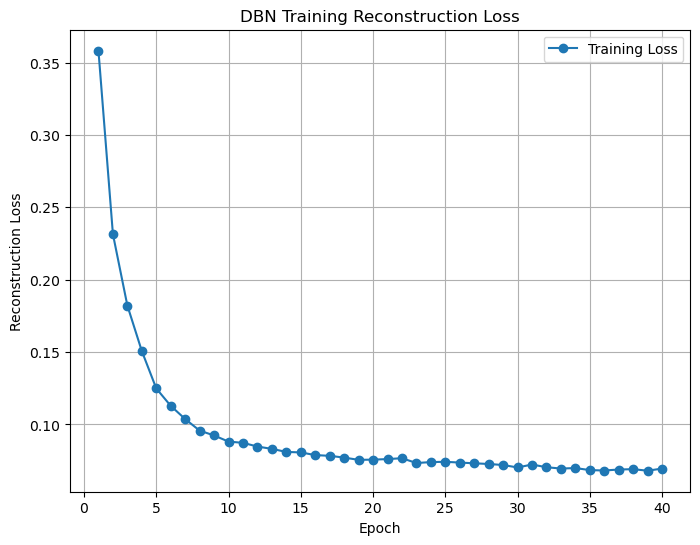

Validation loss: 0.0469
Validation accuracy: 70.36%


In [4]:
rbm_for_dbn = copy.deepcopy(rbm)
num_hidden2 = 200
dbn = DBN(rbm_for_dbn, num_hidden2, device=device)

losses = train_dbn(dbn, train_data, epochs=40, learning_rate=0.01, batch_size=16, k=5)

plot_training_loss(losses, title="DBN Training Reconstruction Loss", xlabel="Epoch", ylabel="Reconstruction Loss")

loss, acc = evaluate_dbn(dbn, test_data, device)
print(f"Validation loss: {loss:.4f}")
print(f"Validation accuracy: {acc*100:.2f}%")

## RECOMMENDATION ACCURACY
Validation accuracies from above are actually reconstruction accuracies.
Now we will take users from test data, hide some of their ratings and check if our models rates those movies in the same manner.

In [17]:
hide_fraction = 0.2  # Hide 20% of rated movies
accuracy_rbm, accuracy_dbn = test_recommendation_ability(rbm, dbn, test_data, device, hide_fraction=hide_fraction, k=1)
print(f"RBM Recommendation accuracy: {accuracy_rbm*100:.2f}%")
print(f"DBN Recommendation accuracy: {accuracy_dbn*100:.2f}%")

RBM Recommendation accuracy: 90.62%
DBN Recommendation accuracy: 91.06%


## USAGE EXAMPLE
First, we load the movies dataframe.

In [18]:
movies = load_movies("data\\ml-100k\\u.item")

Now, we pick a random user and print movies they liked (rate >=3 means they liked the movie).

In [39]:
random.seed(100)
random_user = random.randint(1, len(test_data))
rates = test_data[random_user]
movie_from_tensor(rates, movies)

watched = torch.zeros_like(rates)
watched[rates != 0] = 1

'Toy Story (1995)' has the following genres:
Animation, Children's, Comedy
--------------------------------------------------
'Braveheart (1995)' has the following genres:
Drama, War
--------------------------------------------------
'Star Wars (1977)' has the following genres:
Adventure, Romance, Sci-Fi, War
--------------------------------------------------
'Shawshank Redemption, The (1994)' has the following genres:

--------------------------------------------------
'Fargo (1996)' has the following genres:
Drama, Thriller
--------------------------------------------------
'Wallace & Gromit: The Best of Aardman Animation (1996)' has the following genres:

--------------------------------------------------
'Rock, The (1996)' has the following genres:
Adventure, Thriller
--------------------------------------------------
'Wizard of Oz, The (1939)' has the following genres:
Children's, Drama, Musical
--------------------------------------------------
'Die Hard (1988)' has the following

Now, the idea is to reconstruct the users watched list, and keep the probabilities from reconstruction. We pick the largest n=5 probabilities of movies the user has not watched as recommendation.

First we use RBM.

In [40]:
probs, v = rbm.reconstruct(rates)
to_recommend = recommend(watched, probs, 5)
movie_from_tensor(to_recommend, movies)


'Usual Suspects, The (1995)' has the following genres:
Thriller
--------------------------------------------------
'Twister (1996)' has the following genres:
Adventure, Thriller
--------------------------------------------------
'Jerry Maguire (1996)' has the following genres:
Romance
--------------------------------------------------
'Eraser (1996)' has the following genres:
Thriller
--------------------------------------------------
'Program, The (1993)' has the following genres:
Drama
--------------------------------------------------


Then we use DBN.

In [41]:
probs, v = dbn.reconstruct(rates)
to_recommend = recommend(watched, probs, 5)
movie_from_tensor(to_recommend, movies)

'Twelve Monkeys (1995)' has the following genres:
Sci-Fi
--------------------------------------------------
'Groundhog Day (1993)' has the following genres:
Romance
--------------------------------------------------
'Jerry Maguire (1996)' has the following genres:
Romance
--------------------------------------------------
'Game, The (1997)' has the following genres:
Thriller
--------------------------------------------------
'Carrie (1976)' has the following genres:

--------------------------------------------------
